In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from pylab import mpl
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

In [3]:
#切資料/評估工具
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [4]:
#方法集
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

In [25]:
#data1=pd.read_csv(".\\hw2_data\\data1\\train_forest.csv",header=None)

In [178]:
data1_true=pd.read_csv(".\\hw2_data\\data7\\train.csv",header=None)
data1=pd.read_csv(".\\hw2_data\\data7\\train_forest.csv",header=None)
data1=pd.concat([data1,data1_true.iloc[:,-1]],axis=1)

In [179]:
data1.head()

,0,1,2,3,4,5,6
0,-2.3,0.568,4.7986,3.9474,3.1700,0.150000,0.27
1,-2.3,0.568,4.7800,3.9900,3.1700,0.200000,0.78
2,-2.3,0.568,4.7800,4.0171,3.1700,0.225000,1.18
3,-2.3,0.568,4.7800,3.9985,3.1700,0.214771,1.82
4,-2.3,0.568,4.7800,3.9900,3.1688,0.212521,3.76


In [180]:
from sklearn.impute import KNNImputer 
imputer = KNNImputer(n_neighbors=4,weights="distance") 
imputed_data1 = imputer.fit_transform(data1) 
data1 = pd.DataFrame(imputed_data1) 
data1.head()

,0,1,2,3,4,5,6
0,-2.3,0.568,4.7986,3.9474,3.1700,0.150000,0.27
1,-2.3,0.568,4.7800,3.9900,3.1700,0.200000,0.78
2,-2.3,0.568,4.7800,4.0171,3.1700,0.225000,1.18
3,-2.3,0.568,4.7800,3.9985,3.1700,0.214771,1.82
4,-2.3,0.568,4.7800,3.9900,3.1688,0.212521,3.76


In [181]:
#切割資料，train:test=0.75:0.25
train_data,test_data,train_labels,test_labels=train_test_split(data1.iloc[:,0:6],data1.iloc[:,-1],test_size=0.15, random_state=69)
print('Size of training dataset:', train_data.shape)
print('Size of testing dataset:', test_data.shape)

Size of training dataset: (196, 6)
Size of testing dataset: (35, 6)


In [182]:
from deepforest import CascadeForestRegressor
# Create the model
deepft = CascadeForestRegressor()

# Learn the digits on the train subset
deepft.fit(train_data.values, train_labels.values)

# Predict the value of the digit on the testing subset
predicted = deepft.predict(test_data.values)

# Calculate MSE/MAE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
MSE= mean_squared_error(test_labels, predicted)
print('Mean_squared_error of testing dataset: ', MSE)
MAE= mean_absolute_error(test_labels, predicted)
print('Mean_absolute_error of testing dataset: ', MAE)
predicted=predicted.reshape((predicted.shape[0]))

[2021-10-25 13:58:34.869] Start to fit the model:
[2021-10-25 13:58:34.870] Fitting cascade layer = 0 
[2021-10-25 13:58:35.168] layer = 0  | Val MSE = 182.96552 | Elapsed = 0.298 s
[2021-10-25 13:58:35.168] Fitting cascade layer = 1 
[2021-10-25 13:58:35.471] layer = 1  | Val MSE = 132.50917 | Elapsed = 0.303 s
[2021-10-25 13:58:35.471] Fitting cascade layer = 2 
[2021-10-25 13:58:35.774] layer = 2  | Val MSE = 141.45011 | Elapsed = 0.303 s
[2021-10-25 13:58:35.774] Early stopping counter: 1 out of 2
[2021-10-25 13:58:35.774] Fitting cascade layer = 3 
[2021-10-25 13:58:36.094] layer = 3  | Val MSE = 119.18216 | Elapsed = 0.319 s
[2021-10-25 13:58:36.094] Fitting cascade layer = 4 
[2021-10-25 13:58:36.440] layer = 4  | Val MSE = 141.57109 | Elapsed = 0.346 s
[2021-10-25 13:58:36.440] Early stopping counter: 1 out of 2
[2021-10-25 13:58:36.442] Fitting cascade layer = 5 
[2021-10-25 13:58:36.769] layer = 5  | Val MSE = 134.72309 | Elapsed = 0.327 s
[2021-10-25 13:58:36.769] Early stop

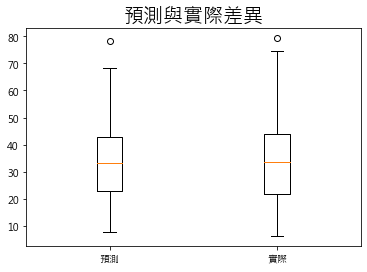

In [114]:
compare=[predicted,test_labels]

plt.boxplot(compare, labels= ['預測', '實際'])
plt.title("預測與實際差異",{"fontsize" : 20} )
plt.show()

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


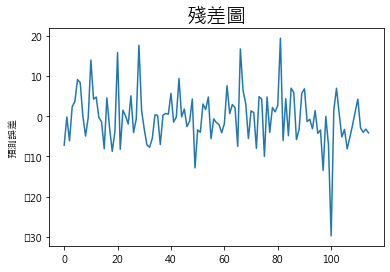

In [115]:
plt.plot([x for x in range(0,len(predicted-test_labels))],predicted-test_labels)
plt.ylabel("預測誤差")
plt.title("殘差圖",{"fontsize" : 20} )
plt.show()

In [116]:
data1_test=pd.read_csv(".\\hw2_data\\data1\\test_cart.csv",header=None)

In [117]:
data1_test

,0,1,2,3,4,5,6,7
0,239.98,74.59,85.27,180.59,9.00,825.00,805.00,28.0
1,525.00,0.00,0.00,189.00,0.00,1107.33,613.00,48.9
2,339.42,66.01,38.90,185.46,9.00,825.00,805.00,28.0
3,230.00,0.00,129.64,195.50,4.60,1029.40,758.60,56.0
4,184.00,112.09,190.00,179.83,6.00,1021.29,623.00,35.2
...,...,...,...,...,...,...,...,...
304,332.50,142.50,0.00,228.00,0.00,932.00,594.00,180.0
305,276.00,116.00,90.00,180.00,9.00,870.00,768.00,28.0
306,443.87,0.00,0.00,196.65,0.00,1125.00,613.00,180.0
307,116.00,173.00,14.30,192.00,2.82,1026.87,732.44,26.0


In [118]:
predicted = deepft.predict(data1_test)
predicted=predicted.reshape((predicted.shape[0]))

[2021-10-20 14:45:46.819] Start to evalute the model:
[2021-10-20 14:45:46.824] Evaluating cascade layer = 0 
[2021-10-20 14:45:46.951] Evaluating cascade layer = 1 


In [119]:
one=pd.concat([data1_test,pd.DataFrame(predicted)],axis=1)

In [120]:
one.head()

,0,1,2,3,4,5,6,7,0
0,239.98,74.59,85.27,180.59,9.0,825.00,805.0,28.0,36.884675
1,525.00,0.00,0.00,189.00,0.0,1107.33,613.0,48.9,49.047425
2,339.42,66.01,38.90,185.46,9.0,825.00,805.0,28.0,47.890325
3,230.00,0.00,129.64,195.50,4.6,1029.40,758.6,56.0,32.746500
4,184.00,112.09,190.00,179.83,6.0,1021.29,623.0,35.2,33.084100


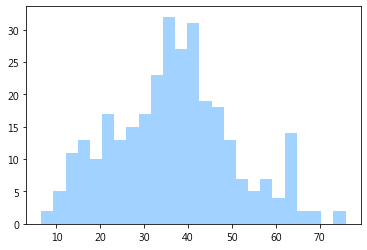

In [121]:
plt.hist(one.iloc[:,-1],bins=25,color="#A2D2FF")
plt.show()

In [122]:
one.to_csv(".\\xgboost\\cart_deepforest_data1.csv",header=False, index=False)